In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train (10).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
Outlet_Type Grocery Store Supermarket Type1 S

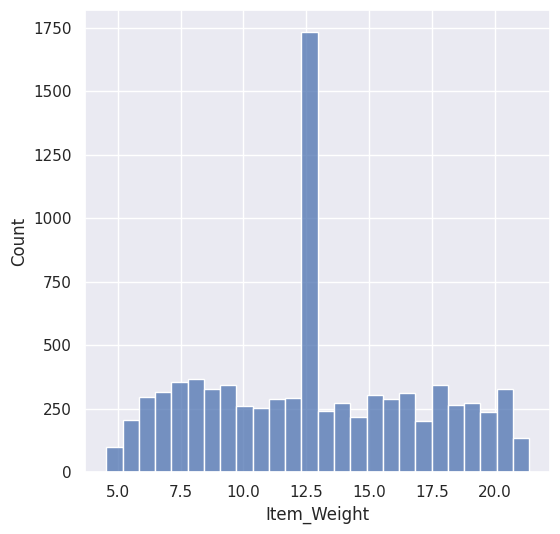

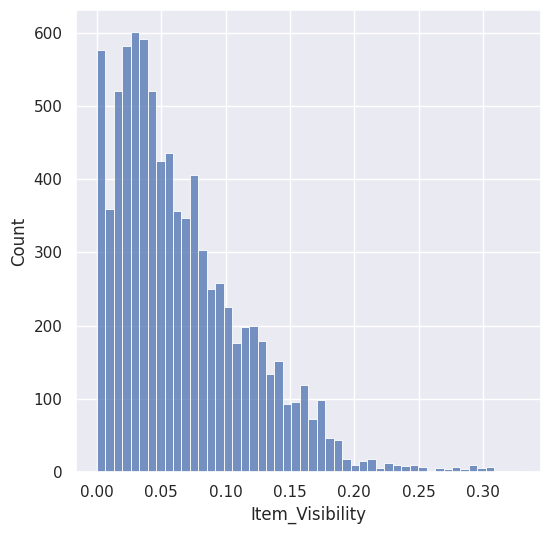

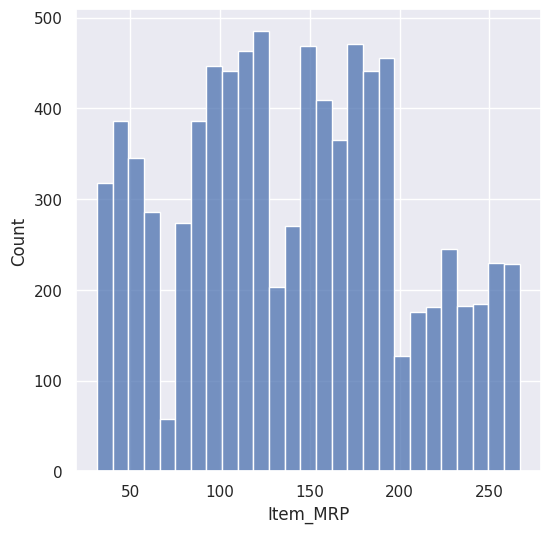

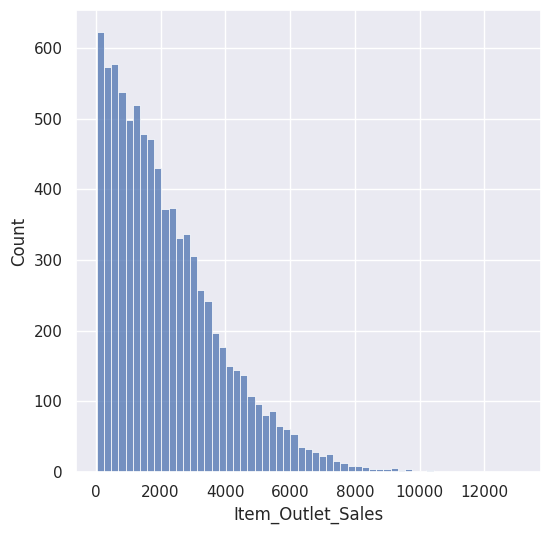

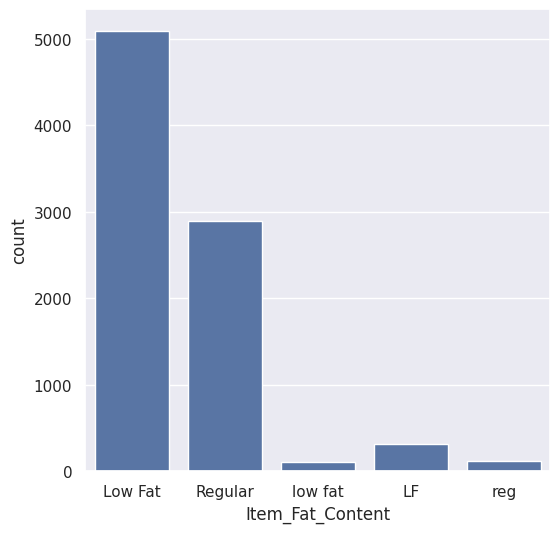

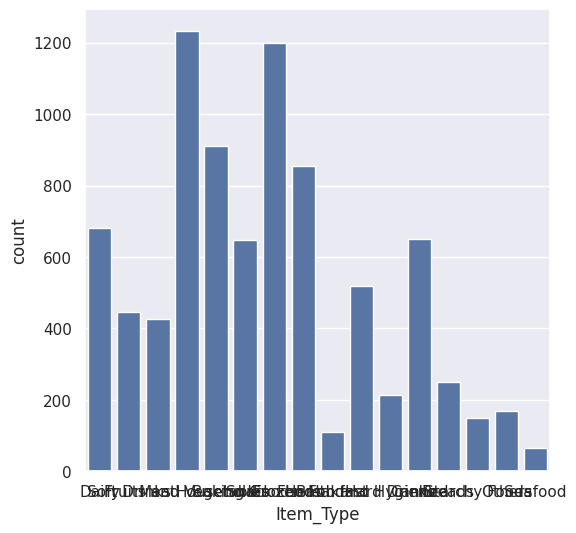

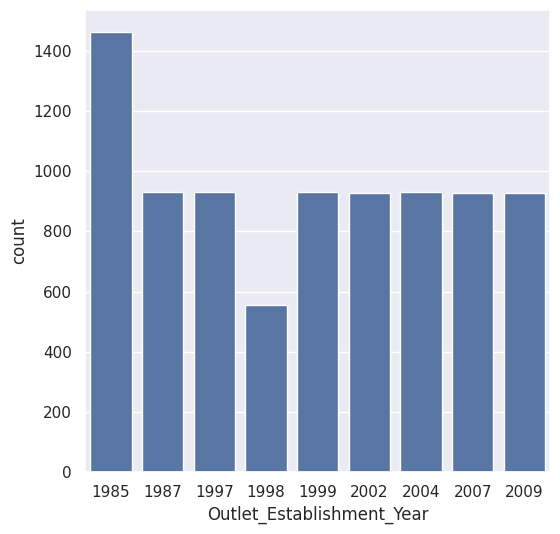

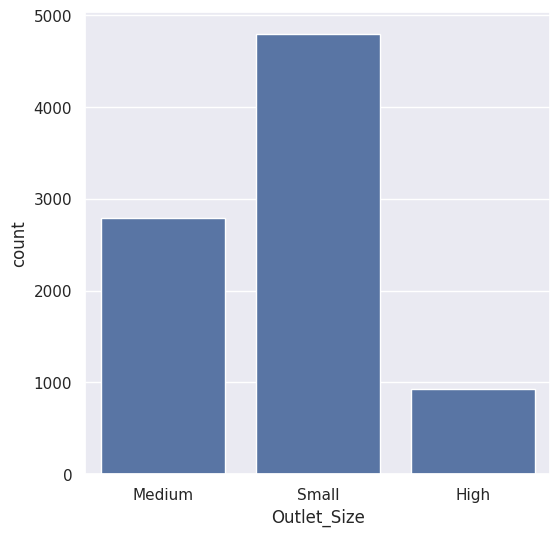

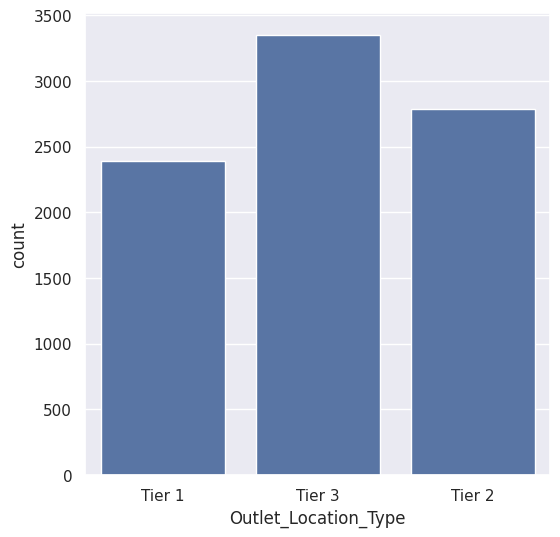

(8523, 11) (5113, 11) (3410, 11)
Mean Absolute Error: 846.5384892049057
Mean Squared Error: 1438187.5768841142
Root Mean Squared Error: 1199.2445859307074
r2: 0.5241033923778181


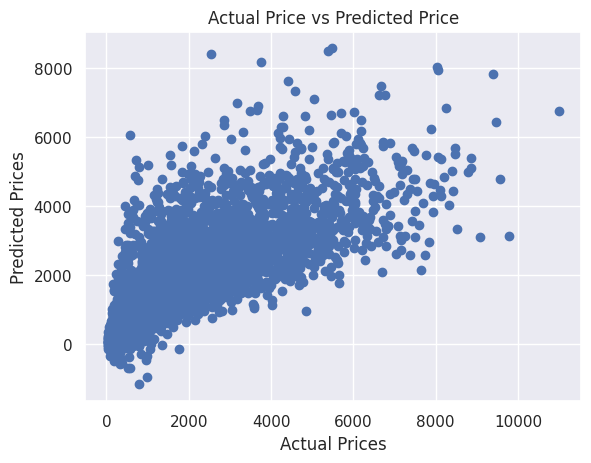

In [13]:
big_mart_data = pd.read_csv('Train.csv')
big_mart_data.head()

big_mart_data.shape
big_mart_data.info()

big_mart_data.isnull().sum()
big_mart_data['Item_Weight'].mean()
big_mart_data['Outlet_Size'].mode()

big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_size)
miss_values = big_mart_data['Outlet_Size'].isnull()
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])
big_mart_data.isnull().sum()

big_mart_data.describe()

sns.set()

plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Weight'])
plt.show()

plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Visibility'])
plt.show()

plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_MRP'])
plt.show()

plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=big_mart_data)
plt.show()

big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
big_mart_data['Item_Fat_Content'].value_counts()

encoder = LabelEncoder()
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

big_mart_data.head()
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

model = XGBRegressor()

model.fit(X_train, Y_train)

test_data_prediction = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, test_data_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction)))
print('r2:', metrics.r2_score(Y_test, test_data_prediction))
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()